In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [26]:
# We won't specify column names/types because the data is small enough that we don't hit issues.
# 'NA' is used both as a categorical value in several of the columns and to represent NaNs.  
# We'll need to sort this out when we engineer features.
train = pd.read_csv('data/house_train.csv')
test = pd.read_csv('data/house_test.csv')

In [27]:
# Categorical (Text) - Encode label -> categorical (integer)
# Categorical (Integer) - One hot!
# Continuous (Float/Integer) - DTB! Check for missing (bomb if missing...), convert to float (if necessary...), check distribution (bomb if skewed, etc...), transform (BoxCox) and scale (StandardScaler).

categorical_text = train.dtypes[train.dtypes == np.object].index.values
continuous_float = train.dtypes[train.dtypes == np.float].index.values

continuous_int_str = 'LotArea, YearBuilt, YearRemodAdd, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold'
continuous_int = continuous_int_str.split(', ')

categorical_int = ['MSSubClass', 'OverallQual', 'OverallCond']

In [28]:
'''train = pd.get_dummies(train, columns=categorical_text, dummy_na=True)
train = pd.get_dummies(train, columns=categorical_int, dummy_na=True)
test = pd.get_dummies(test, columns=categorical_text, dummy_na=True)
test = pd.get_dummies(test, columns=categorical_int, dummy_na=True)'''

all = pd.concat([train, test], axis=0)
all = pd.get_dummies(all, columns=categorical_text, dummy_na=True)
all = pd.get_dummies(all, columns=categorical_int, dummy_na=True)

train = all[:train.shape[0]]
test = all[train.shape[0]:]

test = test.drop('SalePrice', axis=1)

In [30]:
test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,MoSold,OpenPorchSF,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,Street_Grvl,Street_Pave,Street_nan,Alley_Grvl,Alley_Pave,Alley_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,Utilities_AllPub,Utilities_NoSeWa,Utilities_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_nan,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterCond_nan,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_nan,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HeatingQC_nan,CentralAir_N,CentralAir_Y,CentralAir_nan,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,KitchenQua

In [31]:
def continuous_distribution(column_name):
  
  global train, test
  
  plt.figure(figsize=(20,5))

  sns.distplot(train[column_name].dropna(), label='Train')
  sns.distplot(test[column_name].dropna(), label='Test')

  plt.legend()
  plt.show()
  
  plt.figure(figsize=(20,5))

  plt.subplot(121)
  sns.boxplot(train[column_name])
  plt.subplot(122)
  sns.boxplot(test[column_name])

  plt.show()

In [32]:
# Fill NaN with mean. Add column...
# Set outliers to mean. Add column...
# If skewed, apply logp1.

def process_continuous(col):
  
  global train, test
  
  if (np.any(train[col].isnull()) | np.any(test[col].isnull())):
    
    train['%s_Nan' % col] = (train[col].isnull()).astype(np.int)
    test['%s_Nan' % col] = (train[col].isnull()).astype(np.int)
    
    train[col] = train[col].fillna(train[col].mean())
    test[col] = test[col].fillna(test[col].mean())
    
  if (np.any(np.abs(train[col] - train[col].mean()) > (3 * train[col].std())) | np.any(np.abs(test[col] - test[col].mean()) > (3 * test[col].std()))):
    
    train['%s_Outlier' % col] = (np.abs(train[col] - train[col].mean()) > (3 * train[col].std())).astype(np.int)
    test['%s_Outlier' % col] = (np.abs(test[col] - test[col].mean()) > (3 * test[col].std())).astype(np.int)
    
    train.loc[np.abs(train[col] - train[col].mean()) > (3 * train[col].std()), col] = train[col].mean()
    test.loc[np.abs(test[col] - test[col].mean()) > (3 * test[col].std()), col] = test[col].mean()
    
  if ((train[col].skew() > 0.75) | (test[col].skew() > 0.75)):
    
    train[col] = np.log1p(train[col])
    test[col] = np.log1p(test[col])
    
  print train[col].describe()
  print
  print test[col].describe()

  continuous_distribution(col)

LotFrontage



/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view

count    1460.000000
mean       68.908040
std        18.236130
min        21.000000
25%        60.000000
50%        70.049958
75%        78.000000
max       134.000000
Name: LotFrontage, dtype: float64

count    1459.000000
mean       67.835700
std        18.860990
min        21.000000
25%        60.000000
50%        68.580357
75%        77.500000
max       130.000000
Name: LotFrontage, dtype: float64


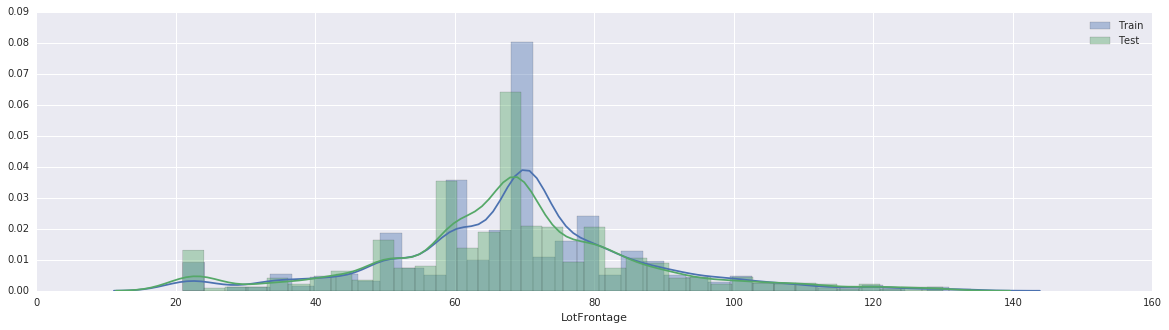

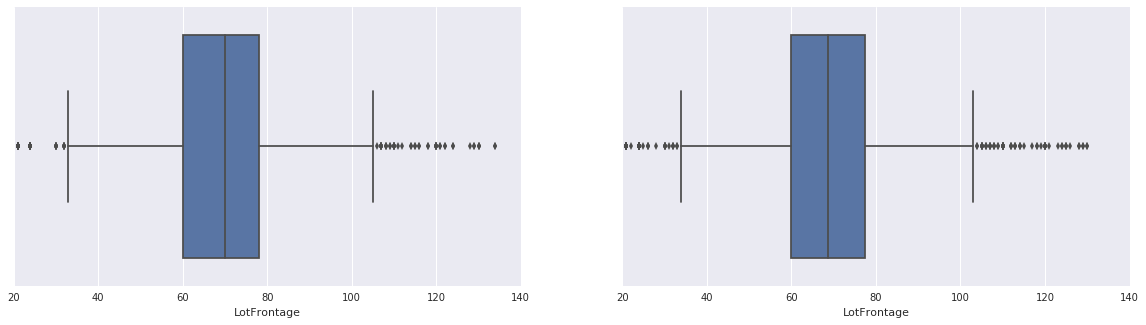

MasVnrArea



/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



count    1460.000000
mean        2.100127
std         2.567723
min         0.000000
25%         0.000000
50%         0.000000
75%         4.976734
max         6.463029
Name: MasVnrArea, dtype: float64

count    1459.000000
mean        2.040168
std         2.554230
min         0.000000
25%         0.000000
50%         0.000000
75%         4.969813
max         6.432940
Name: MasVnrArea, dtype: float64


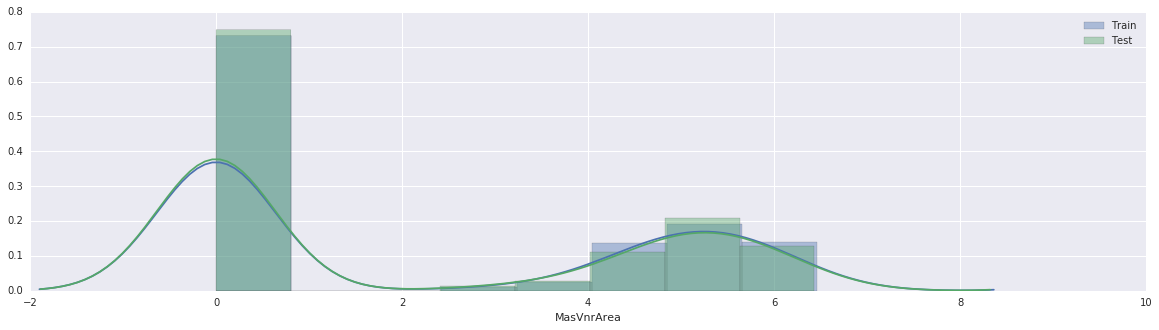

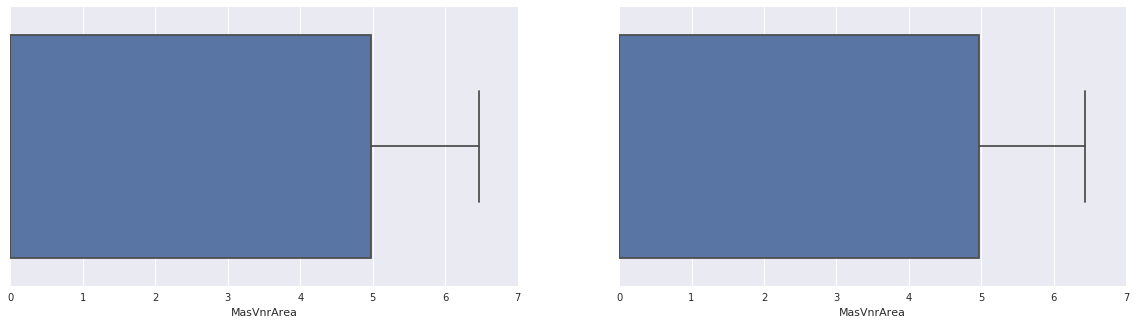

GarageYrBlt

count    1460.000000
mean     1978.609597
std        23.830690
min      1908.000000
25%      1962.000000
50%      1978.506164
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

count    1459.000000
mean     1977.943129
std        24.395475
min      1910.000000
25%      1961.000000
50%      1977.721217
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


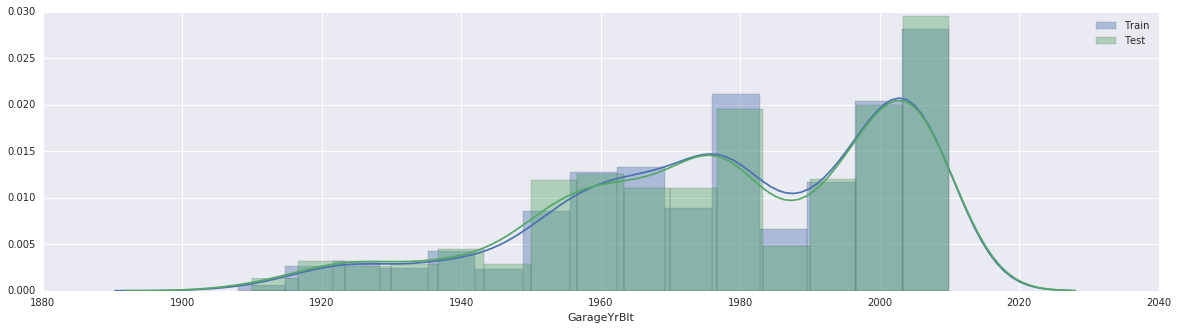

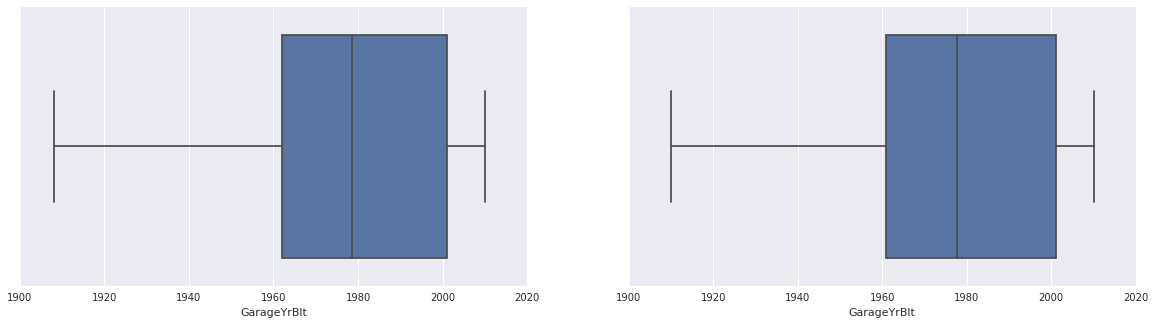

In [33]:
for column_name in continuous_float:
  print column_name
  print
  process_continuous(column_name)

LotArea



/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



count    1460.000000
mean        9.093385
std         0.474241
min         7.170888
25%         8.929898
50%         9.156887
75%         9.346836
max        10.599007
Name: LotArea, dtype: float64

count    1459.000000
mean        9.063350
std         0.476233
min         7.293698
25%         8.908154
50%         9.148465
75%         9.337634
max        10.109404
Name: LotArea, dtype: float64


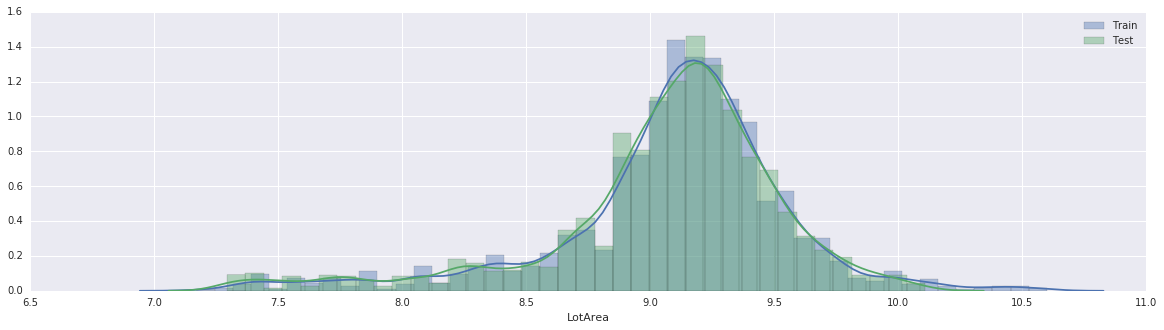

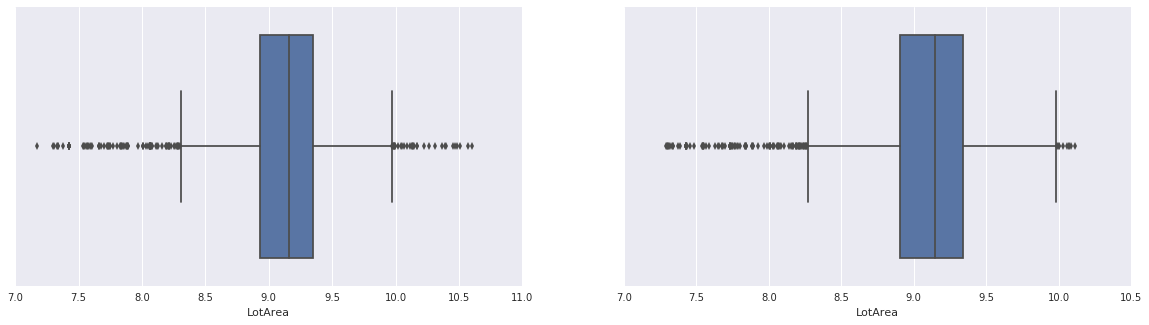

YearBuilt

count    1460.000000
mean     1971.651786
std        29.599407
min      1882.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

count    1459.000000
mean     1971.483698
std        30.198769
min      1890.000000
25%      1953.000000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: YearBuilt, dtype: float64


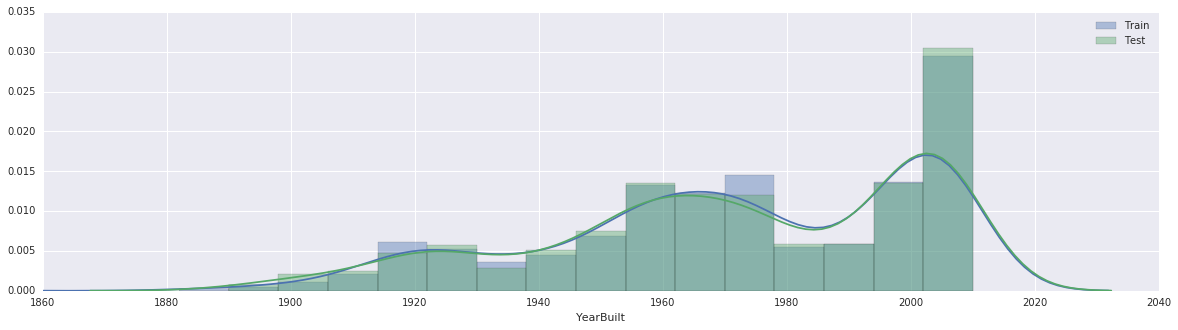

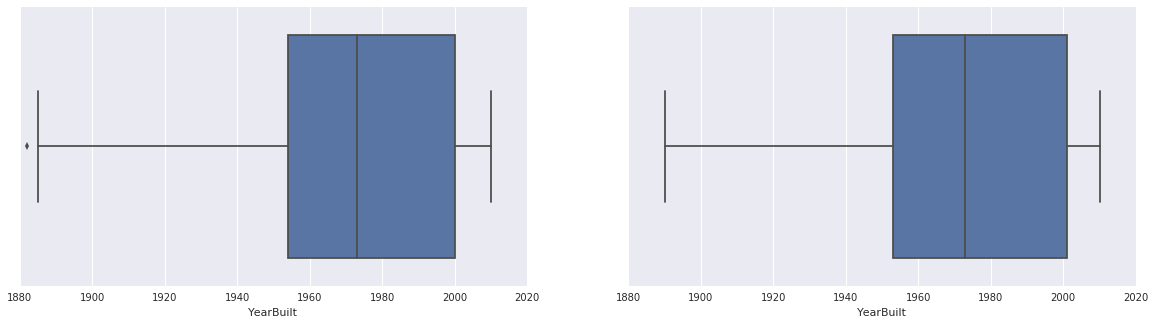

YearRemodAdd

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

count    1459.000000
mean     1983.662783
std        21.130467
min      1950.000000
25%      1963.000000
50%      1992.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


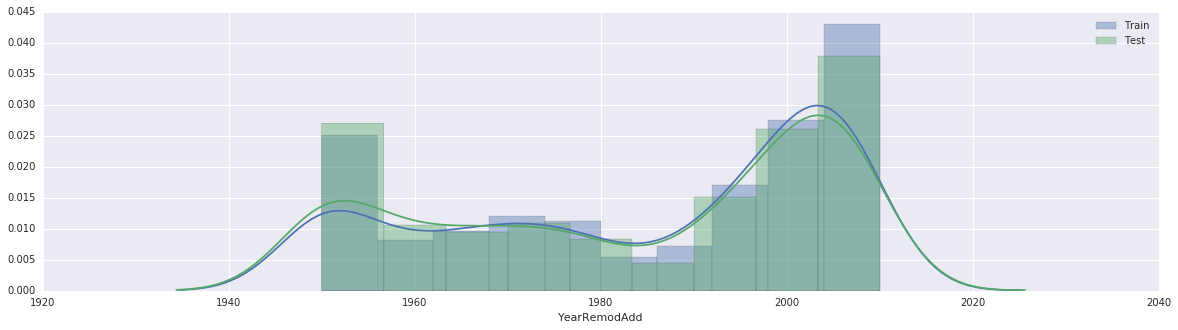

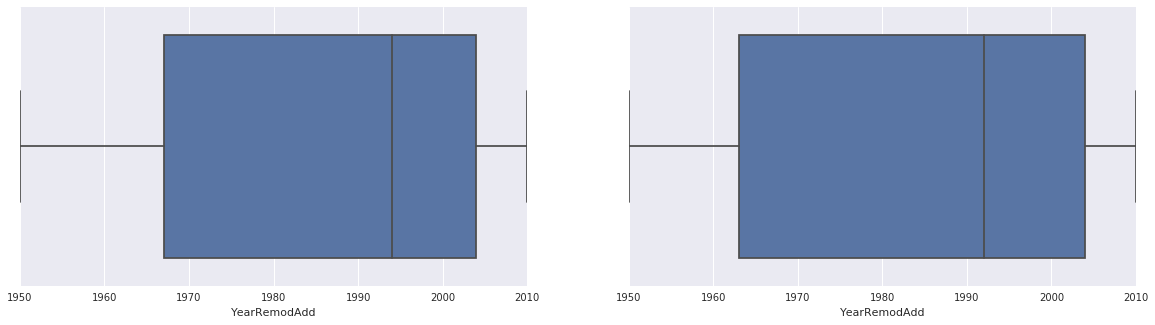

BsmtFinSF1



/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



count    1460.000000
mean        4.222738
std         2.985580
min         0.000000
25%         0.000000
50%         5.951943
75%         6.558552
max         7.501634
Name: BsmtFinSF1, dtype: float64

count    1459.000000
mean        4.213338
std         2.960971
min         0.000000
25%         0.000000
50%         5.863631
75%         6.608000
max         7.472501
Name: BsmtFinSF1, dtype: float64


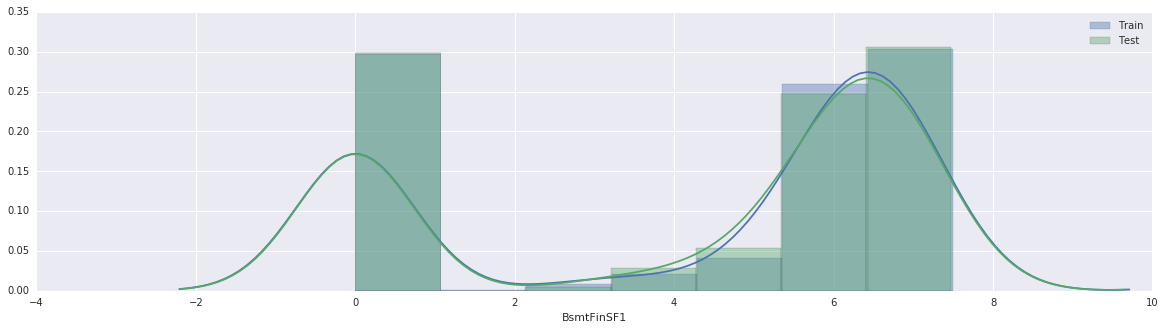

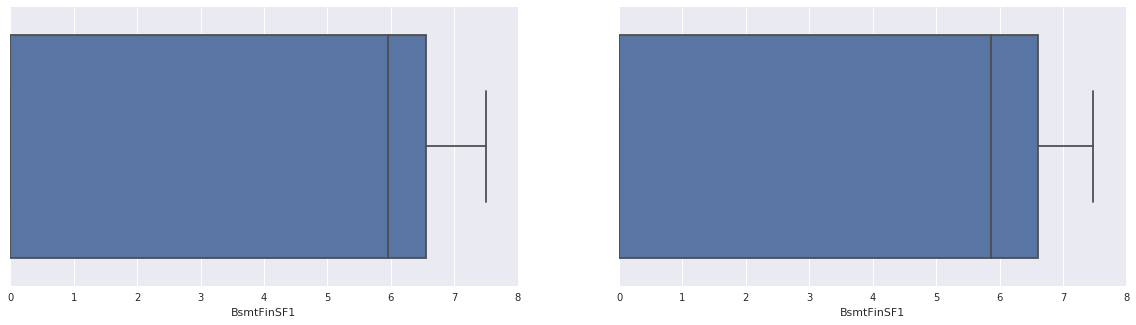

BsmtFinSF2

count    1460.000000
mean        0.561547
std         1.591699
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.228511
Name: BsmtFinSF2, dtype: float64

count    1459.000000
mean        0.612434
std         1.659178
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.320768
Name: BsmtFinSF2, dtype: float64


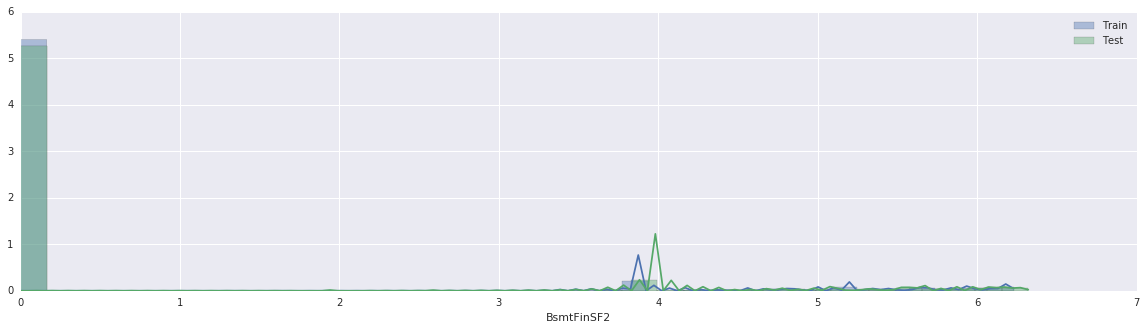

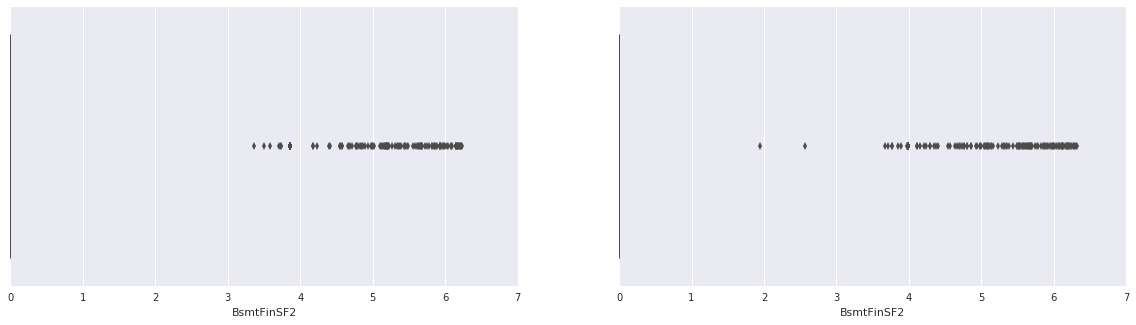

BsmtUnfSF

count    1460.000000
mean        5.638791
std         1.847091
min         0.000000
25%         5.411646
50%         6.170651
75%         6.681168
max         7.533694
Name: BsmtUnfSF, dtype: float64

count    1459.000000
mean        5.601137
std         1.875521
min         0.000000
25%         5.395895
50%         6.133398
75%         6.673928
max         7.524021
Name: BsmtUnfSF, dtype: float64


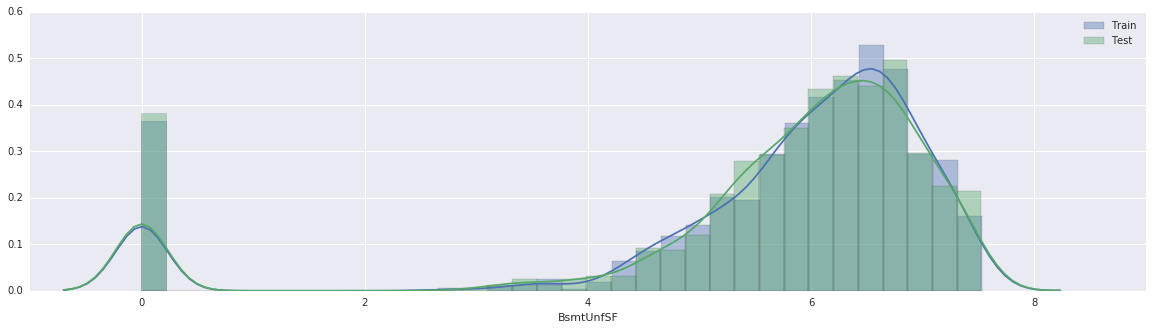

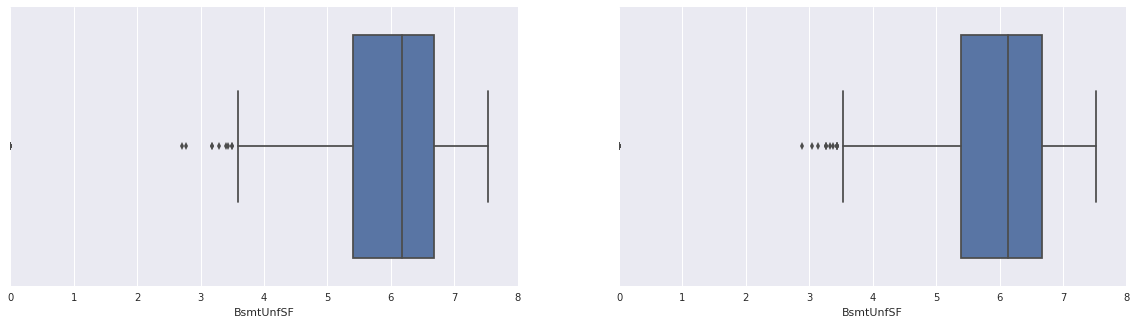

TotalBsmtSF

count    1460.000000
mean     1043.345407
std       394.593755
min         0.000000
25%       795.750000
50%       991.500000
75%      1278.750000
max      2330.000000
Name: TotalBsmtSF, dtype: float64

count    1459.000000
mean     1033.032499
std       411.076832
min         0.000000
25%       784.000000
50%       988.000000
75%      1291.000000
max      2320.000000
Name: TotalBsmtSF, dtype: float64


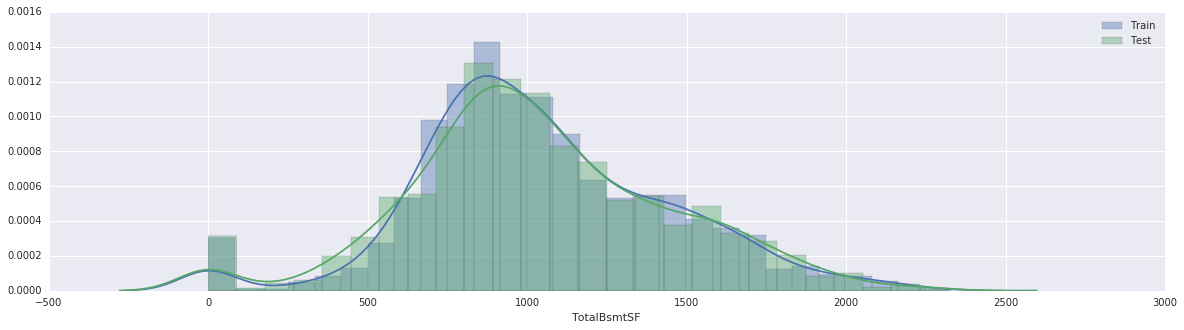

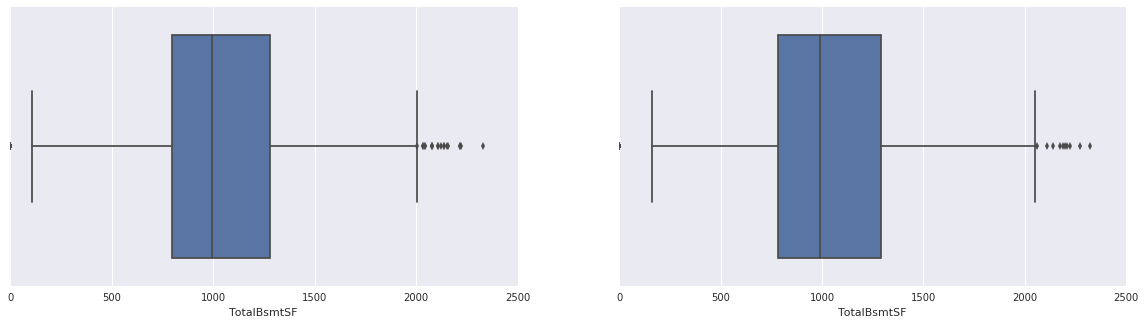

1stFlrSF

count    1460.000000
mean     1149.140767
std       351.839353
min       334.000000
25%       882.000000
50%      1087.000000
75%      1377.250000
max      2259.000000
Name: 1stFlrSF, dtype: float64

count    1459.000000
mean     1138.992155
std       353.463175
min       407.000000
25%       873.500000
50%      1079.000000
75%      1368.000000
max      2338.000000
Name: 1stFlrSF, dtype: float64


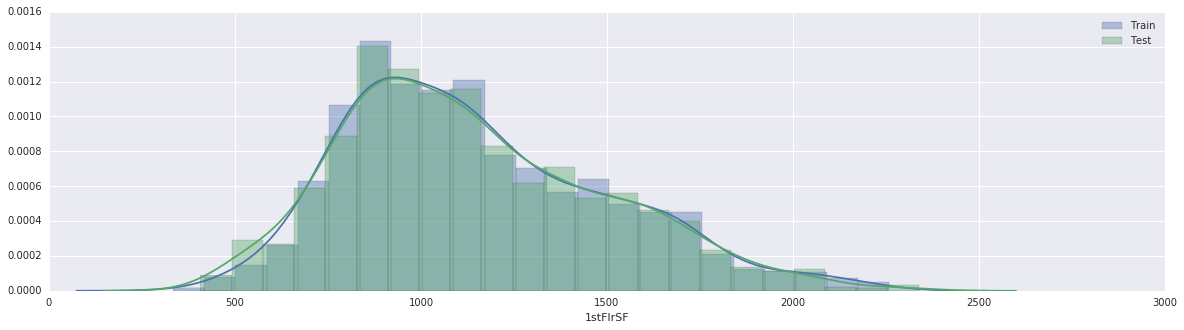

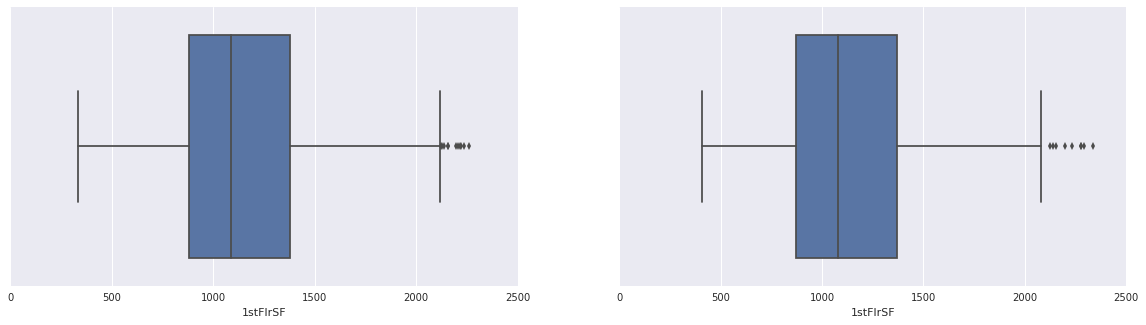

2ndFlrSF

count    1460.000000
mean        2.859956
std         3.287911
min         0.000000
25%         0.000000
50%         0.000000
75%         6.591674
max         7.385231
Name: 2ndFlrSF, dtype: float64

count    1459.000000
mean        2.784327
std         3.249347
min         0.000000
25%         0.000000
50%         0.000000
75%         6.510258
max         7.357556
Name: 2ndFlrSF, dtype: float64


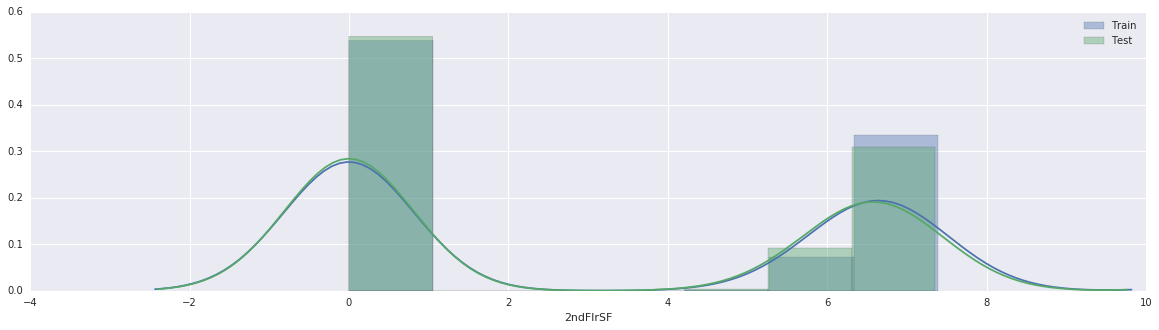

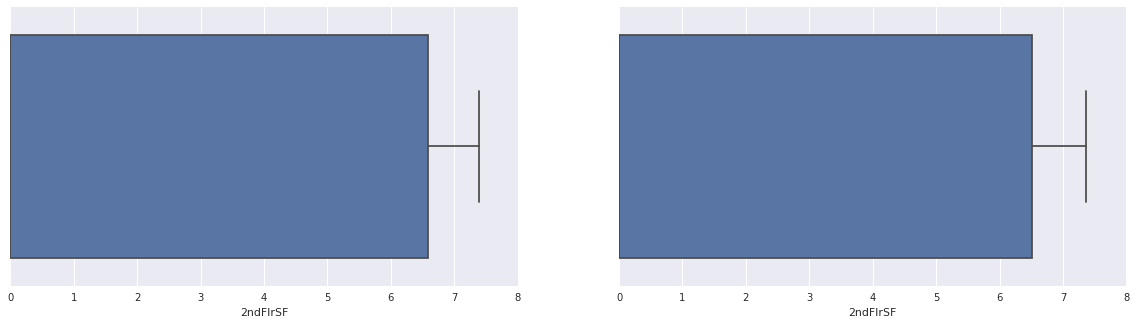

LowQualFinSF

count    1460.000000
mean        0.044804
std         0.363400
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.976734
Name: LowQualFinSF, dtype: float64

count    1459.000000
mean        0.020892
std         0.246236
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.744932
Name: LowQualFinSF, dtype: float64


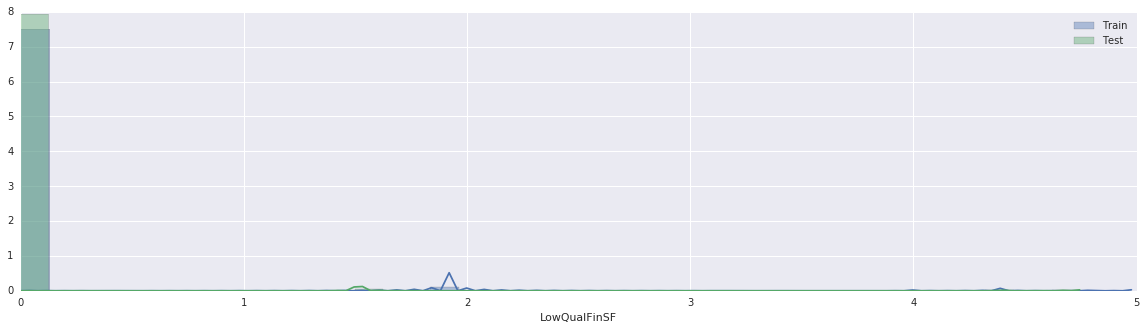

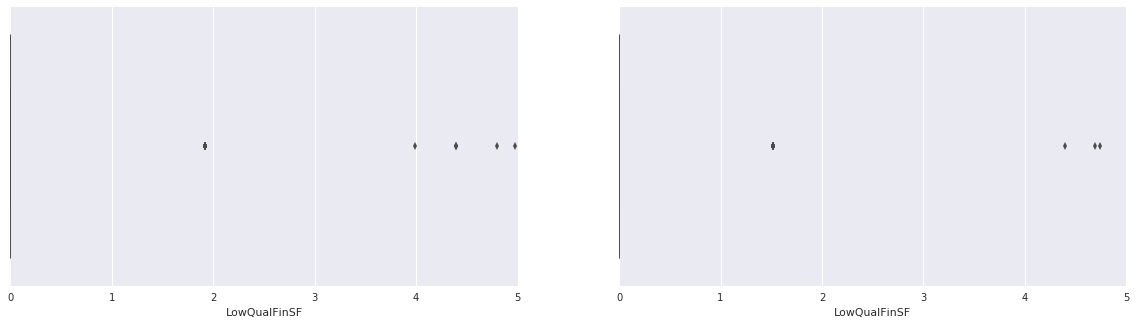

GrLivArea

count    1460.000000
mean     1491.596862
std       467.209359
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1762.500000
max      3086.000000
Name: GrLivArea, dtype: float64

count    1459.000000
mean     1472.553433
std       454.269787
min       407.000000
25%      1117.500000
50%      1432.000000
75%      1713.000000
max      2855.000000
Name: GrLivArea, dtype: float64


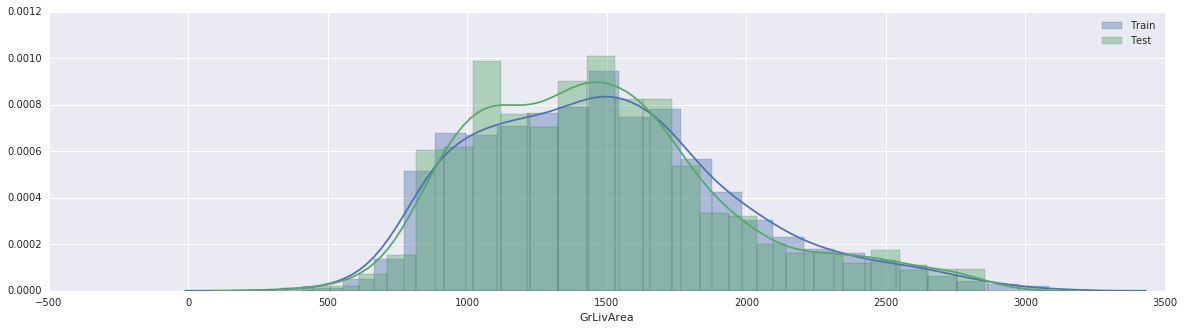

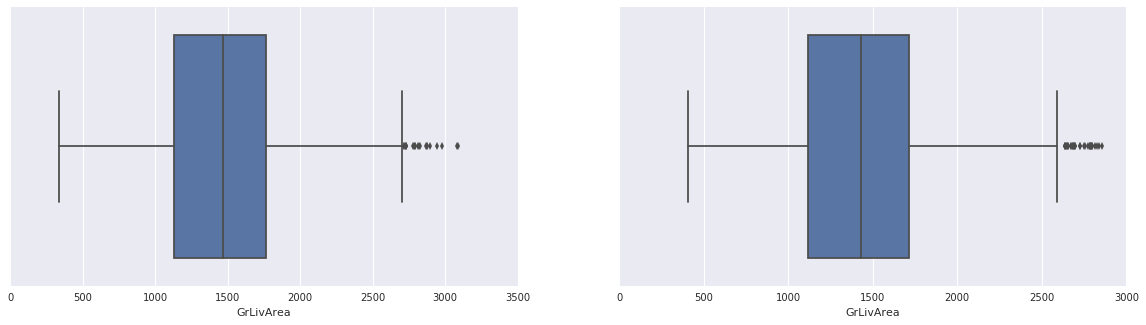

BsmtFullBath

count    1460.000000
mean        0.407401
std         0.488785
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: BsmtFullBath, dtype: float64

count    1459.000000
mean        0.432696
std         0.526007
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: BsmtFullBath, dtype: float64


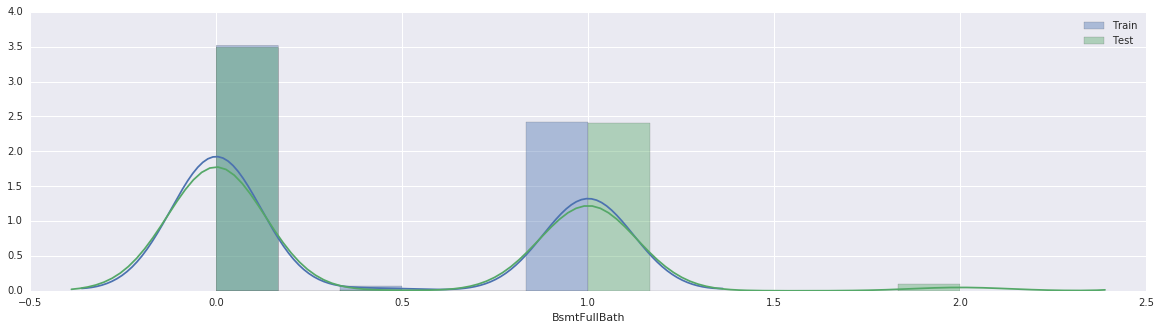

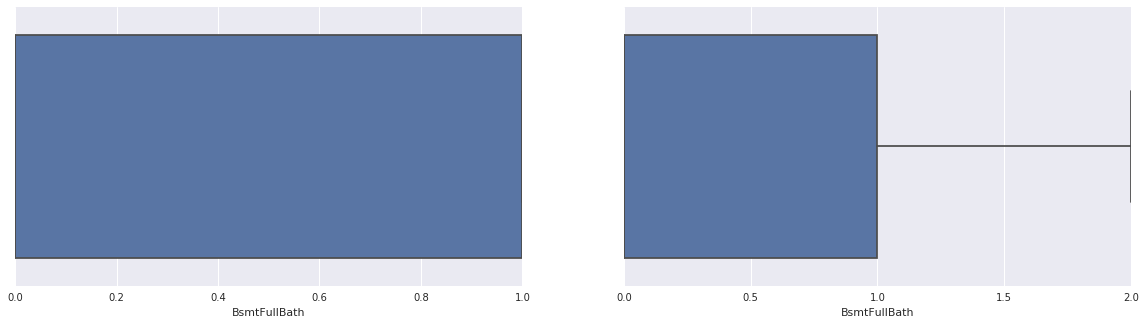

BsmtHalfBath

count    1460.000000
mean        0.003142
std         0.012884
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.055940
Name: BsmtHalfBath, dtype: float64

count    1459.000000
mean        0.004113
std         0.015590
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.063165
Name: BsmtHalfBath, dtype: float64


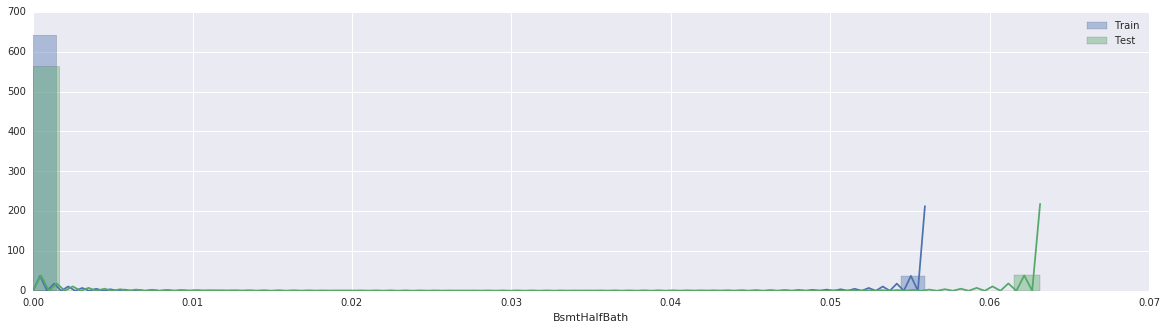

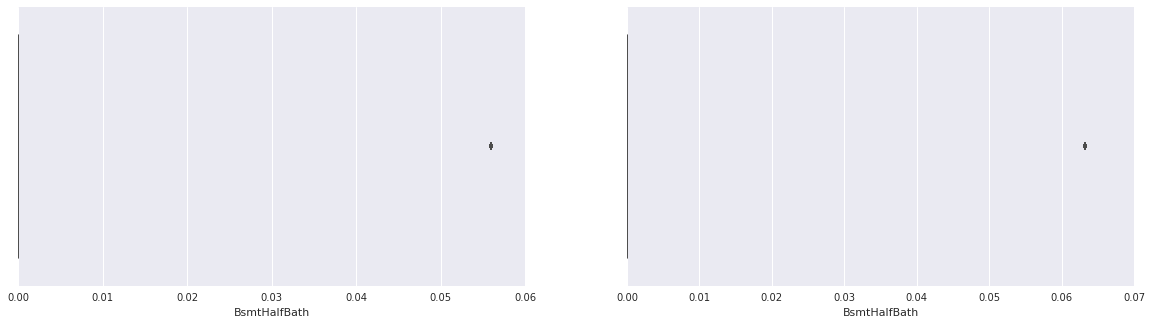

FullBath

count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64

count    1459.000000
mean        1.564279
std         0.540374
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64


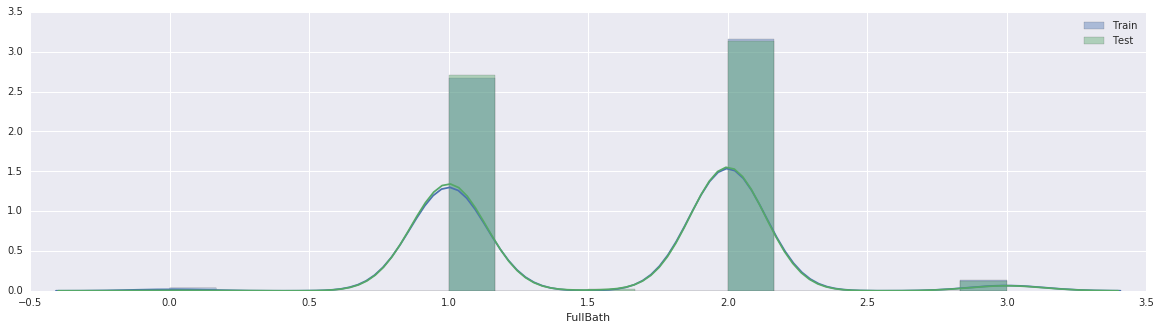

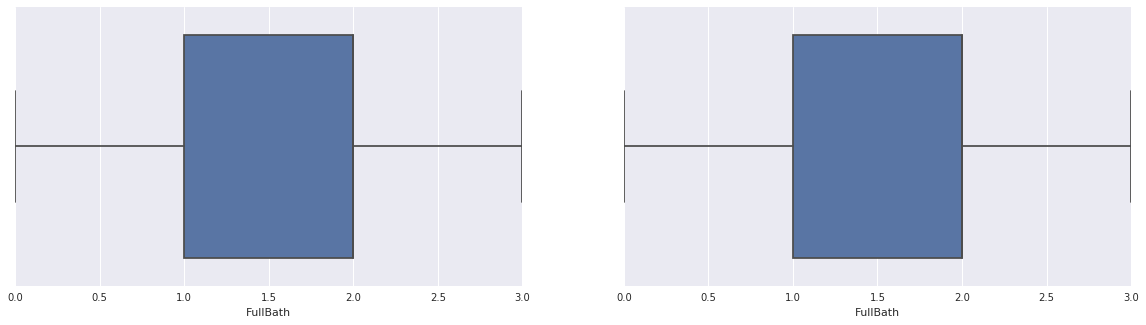

HalfBath

count    1460.000000
mean        0.369585
std         0.480841
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: HalfBath, dtype: float64

count    1459.000000
mean        0.363200
std         0.478904
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: HalfBath, dtype: float64


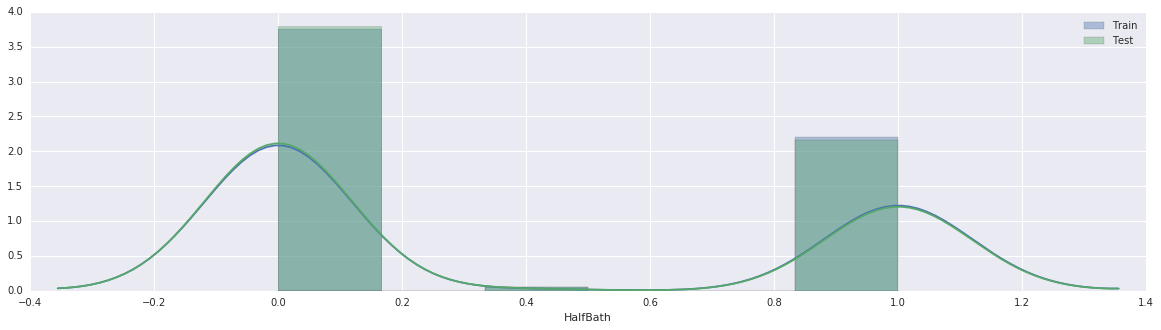

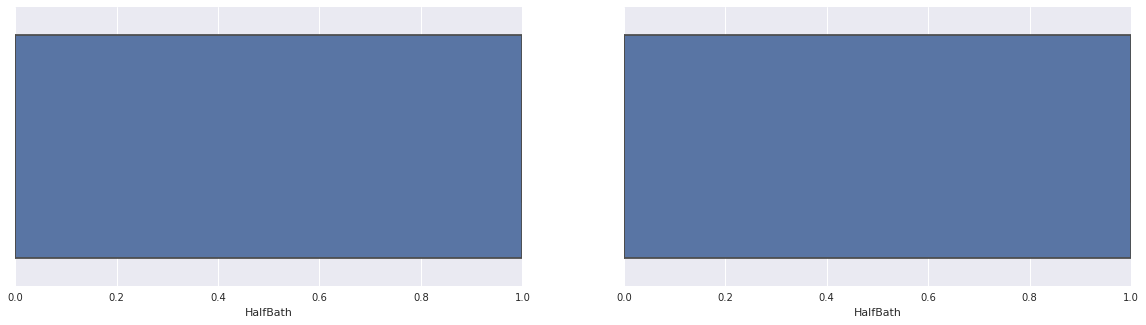

BedroomAbvGr

count    1460.000000
mean        2.859678
std         0.752652
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: BedroomAbvGr, dtype: float64

count    1459.000000
mean        2.827734
std         0.762659
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: BedroomAbvGr, dtype: float64


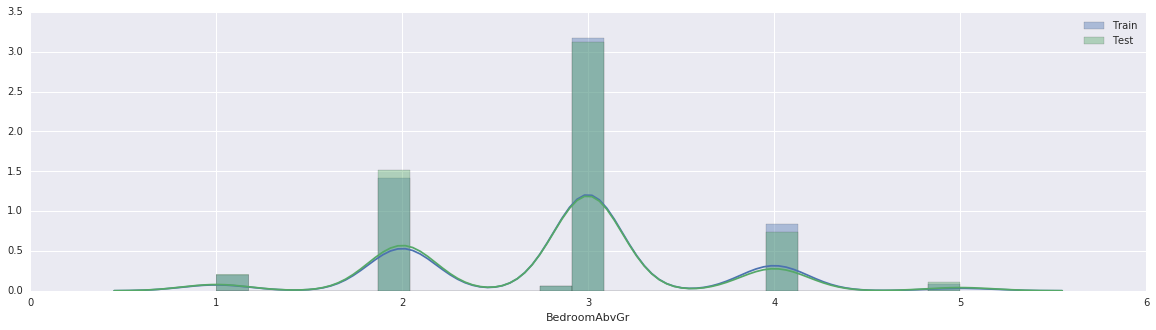

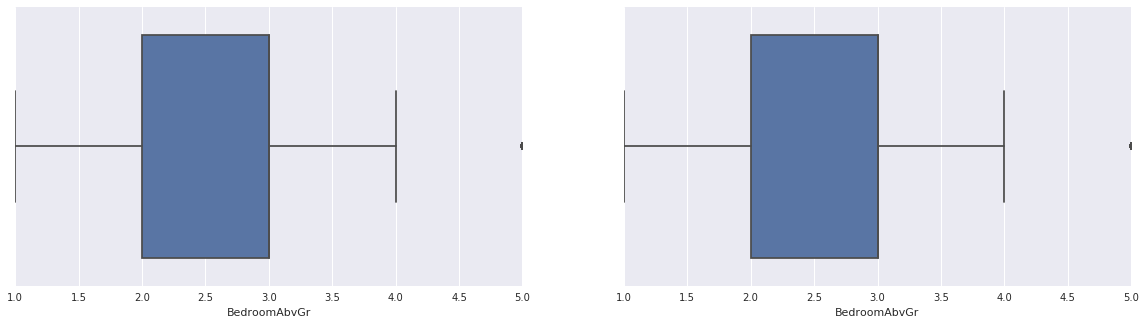

KitchenAbvGr

count    1460.000000
mean        0.694219
std         0.004853
min         0.693147
25%         0.693147
50%         0.693147
75%         0.693147
max         0.716168
Name: KitchenAbvGr, dtype: float64

count    1459.000000
mean        0.694098
std         0.004371
min         0.693147
25%         0.693147
50%         0.693147
75%         0.693147
max         0.714172
Name: KitchenAbvGr, dtype: float64


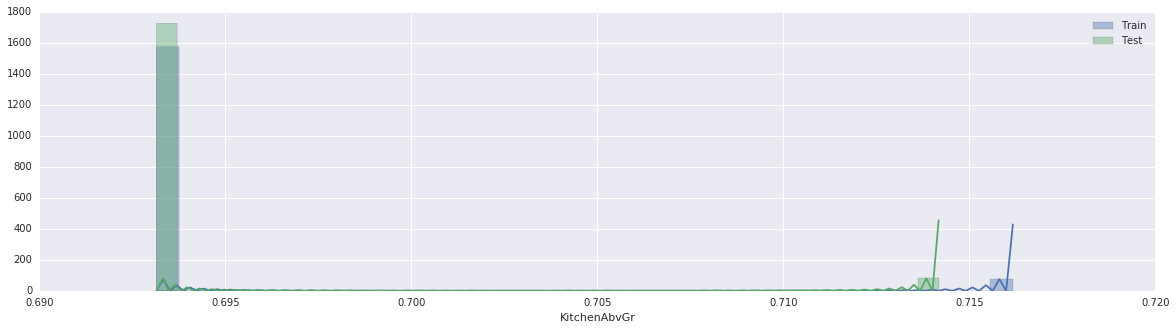

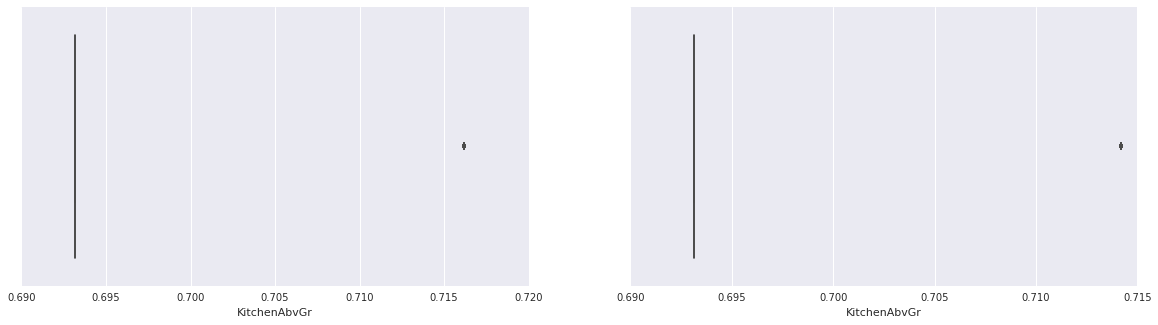

TotRmsAbvGrd

count    1460.000000
mean        6.471379
std         1.541033
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        11.000000
Name: TotRmsAbvGrd, dtype: float64

count    1459.000000
mean        6.311233
std         1.370317
min         3.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: TotRmsAbvGrd, dtype: float64


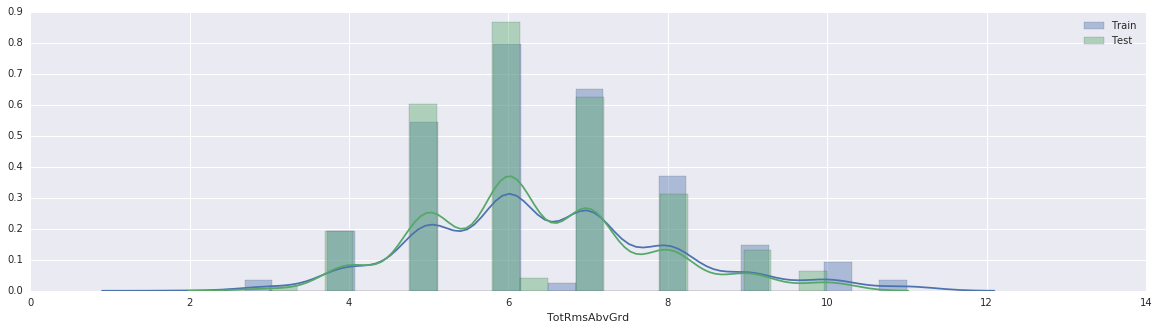

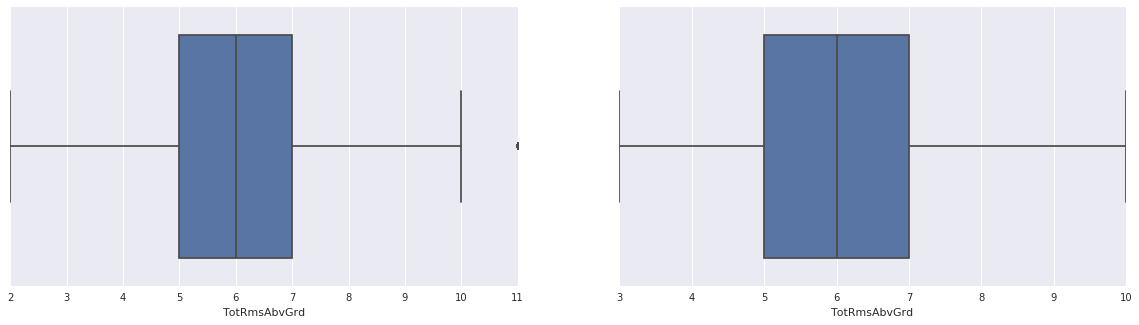

Fireplaces

count    1460.000000
mean        0.604839
std         0.629287
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Fireplaces, dtype: float64

count    1459.00000
mean        0.56893
std         0.62202
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         2.00000
Name: Fireplaces, dtype: float64


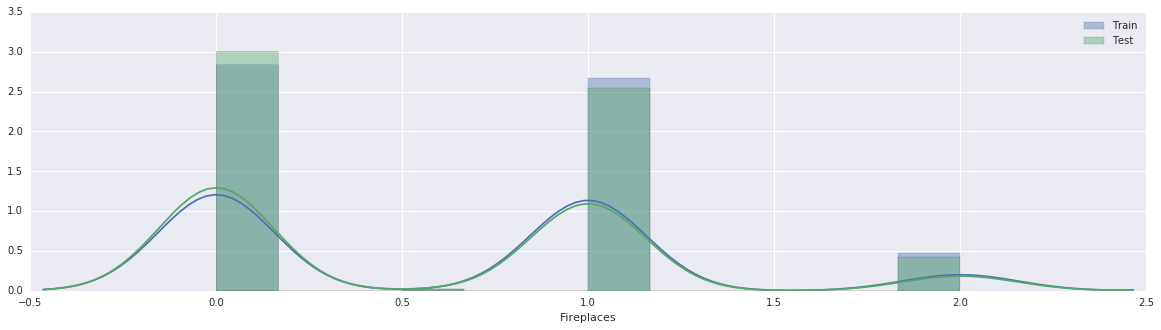

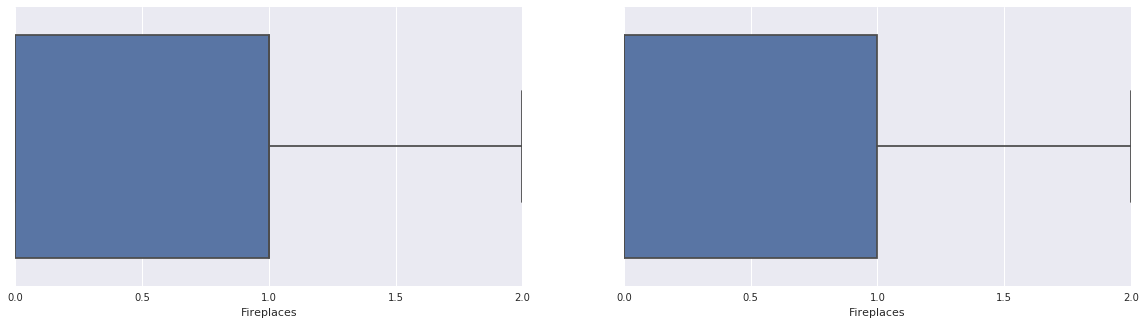

GarageCars

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64

count    1459.000000
mean        1.763901
std         0.771038
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


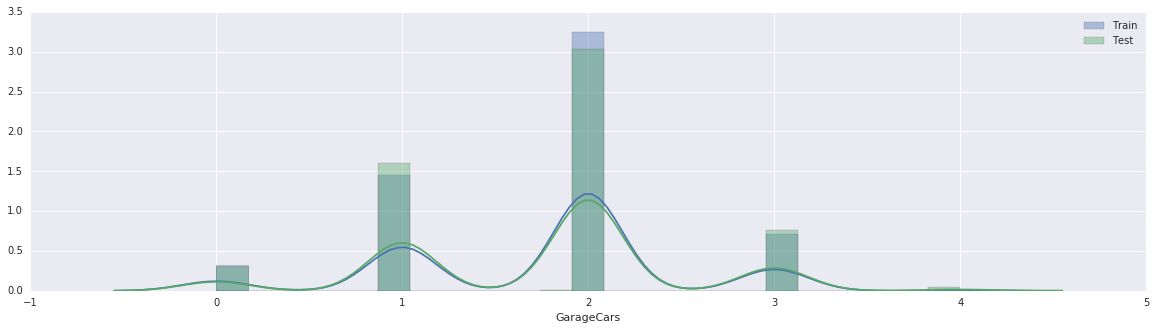

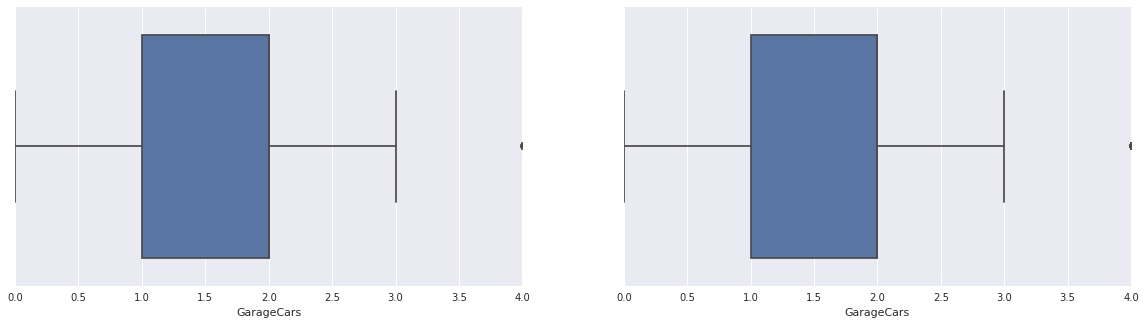

GarageArea

count    1460.000000
mean      469.130042
std       206.281215
min         0.000000
25%       334.500000
50%       478.000000
75%       576.000000
max      1069.000000
Name: GarageArea, dtype: float64

count    1459.000000
mean      467.523274
std       207.255683
min         0.000000
25%       318.000000
50%       477.000000
75%       576.000000
max      1110.000000
Name: GarageArea, dtype: float64


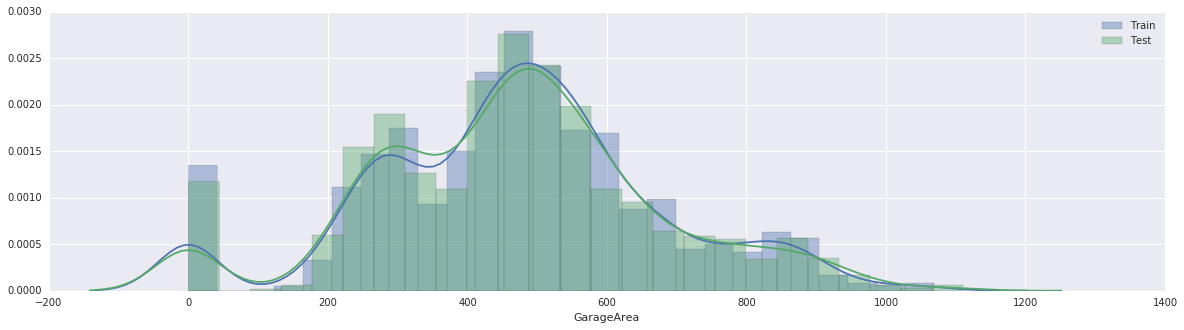

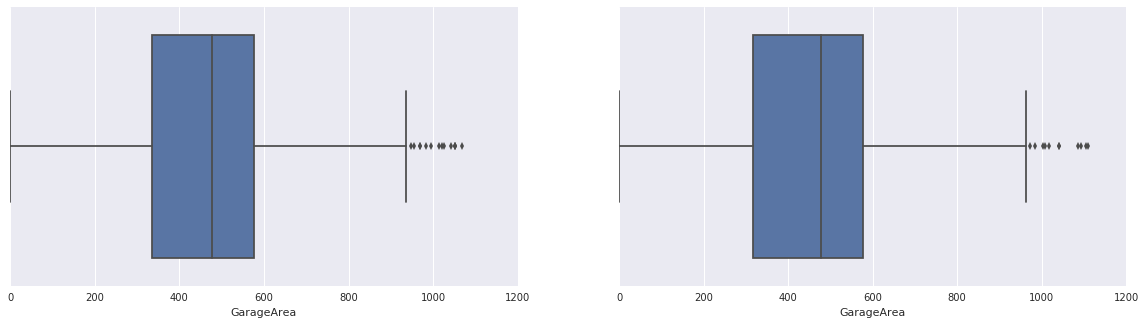

WoodDeckSF

count    1460.000000
mean        2.430363
std         2.565098
min         0.000000
25%         0.000000
50%         0.000000
75%         5.111988
max         6.150603
Name: WoodDeckSF, dtype: float64

count    1459.000000
mean        2.418060
std         2.560511
min         0.000000
25%         0.000000
50%         0.000000
75%         5.099848
max         6.163315
Name: WoodDeckSF, dtype: float64


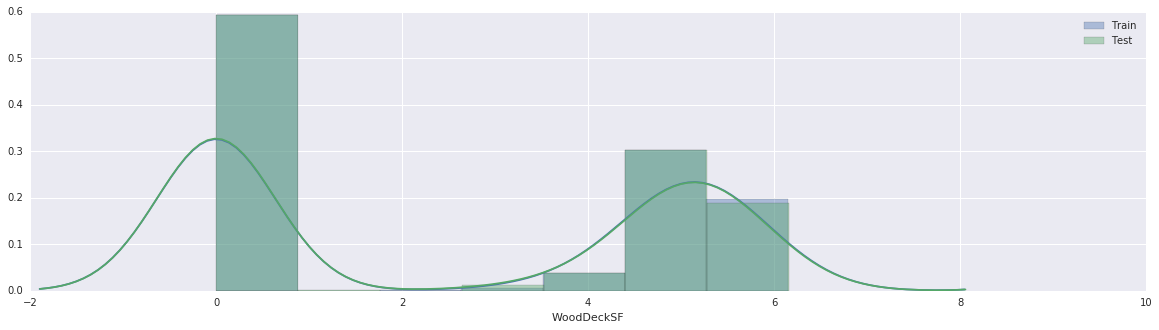

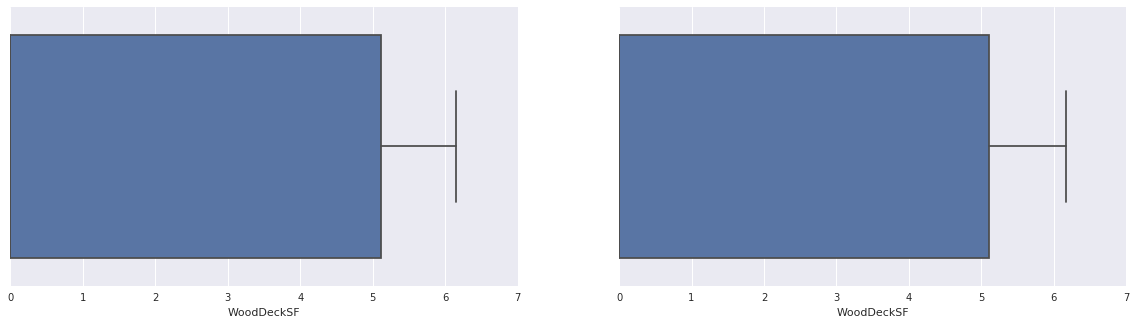

OpenPorchSF

count    1460.000000
mean        2.273718
std         2.111063
min         0.000000
25%         0.000000
50%         3.258097
75%         4.174387
max         5.501258
Name: OpenPorchSF, dtype: float64

count    1459.000000
mean        2.327211
std         2.120639
min         0.000000
25%         0.000000
50%         3.367296
75%         4.234107
max         5.541264
Name: OpenPorchSF, dtype: float64


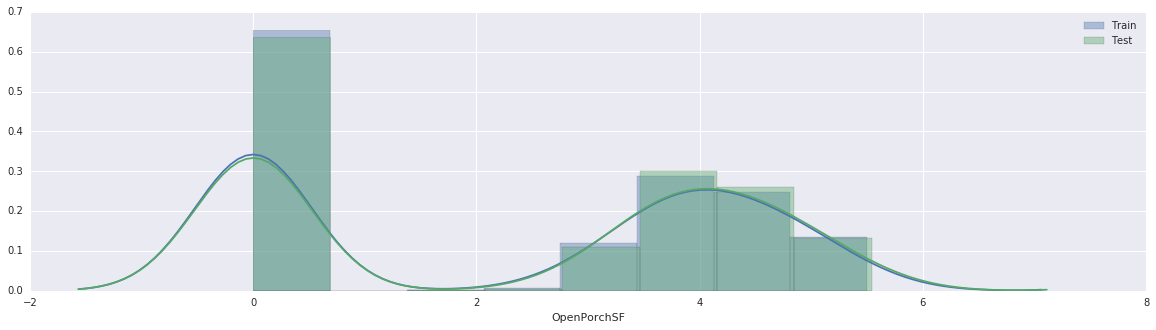

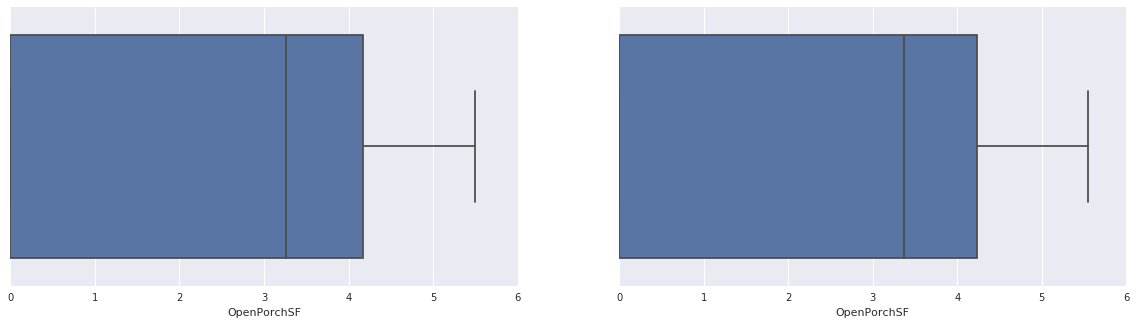

EnclosedPorch

count    1460.000000
mean        0.614359
std         1.538614
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.327876
Name: EnclosedPorch, dtype: float64

count    1459.000000
mean        0.761479
std         1.697733
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.420535
Name: EnclosedPorch, dtype: float64


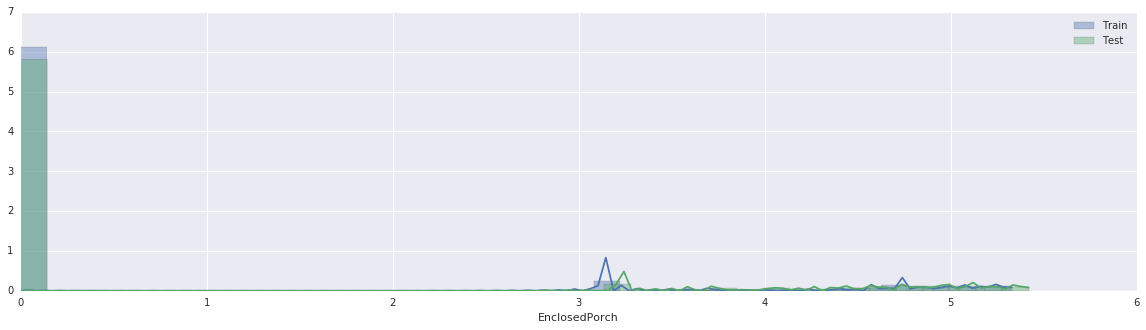

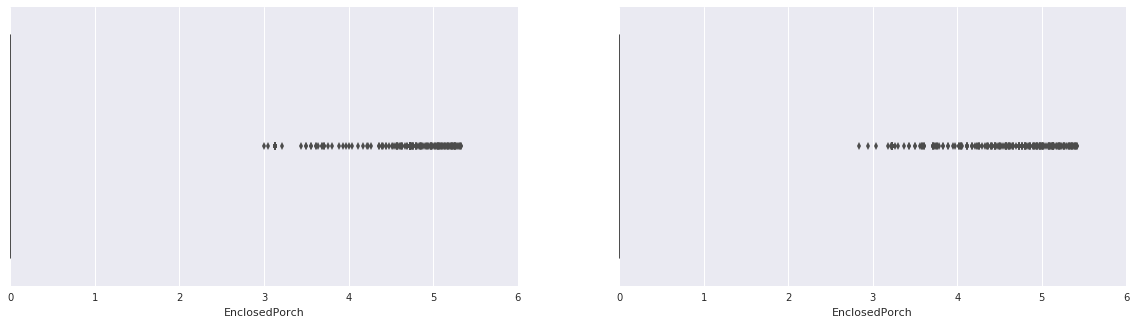

3SsnPorch

count    1460.000000
mean        0.025551
std         0.202425
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.178054
Name: 3SsnPorch, dtype: float64

count    1459.000000
mean        0.009156
std         0.096600
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.027610
Name: 3SsnPorch, dtype: float64


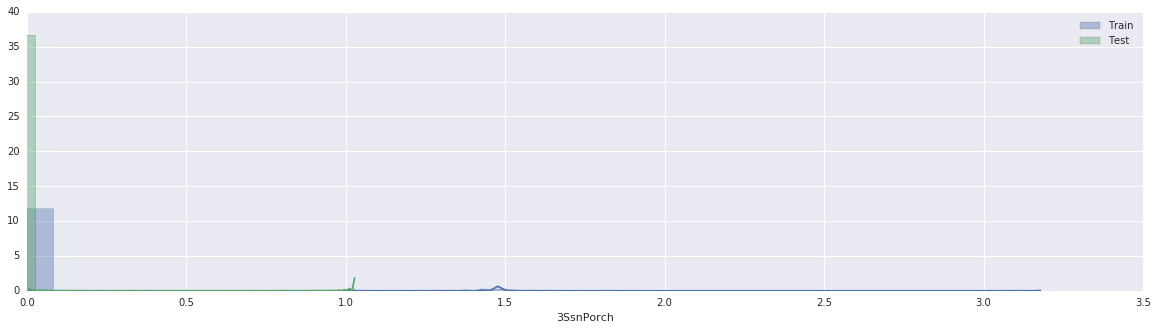

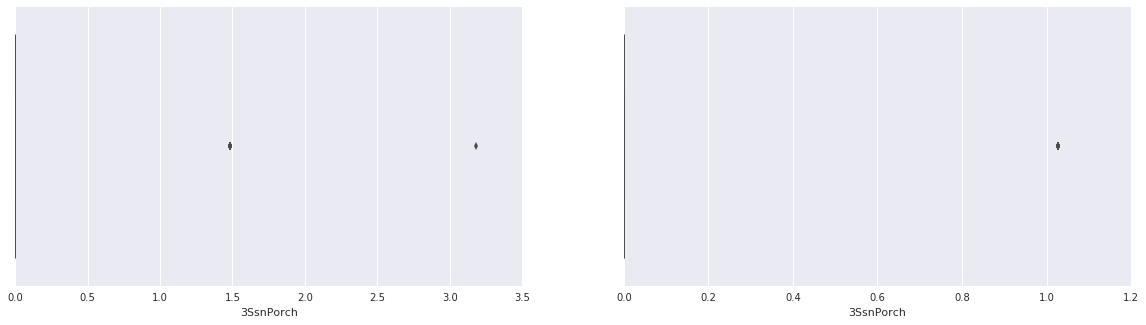

ScreenPorch

count    1460.000000
mean        0.308566
std         1.093577
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.209486
Name: ScreenPorch, dtype: float64

count    1459.000000
mean        0.396794
std         1.256971
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.209486
Name: ScreenPorch, dtype: float64


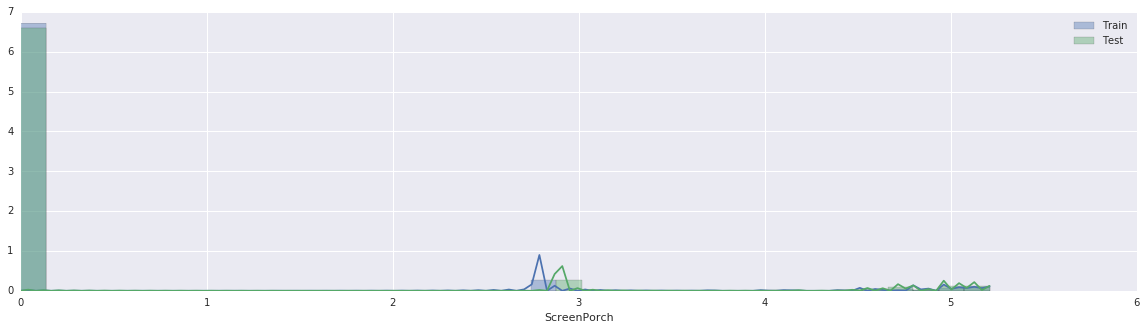

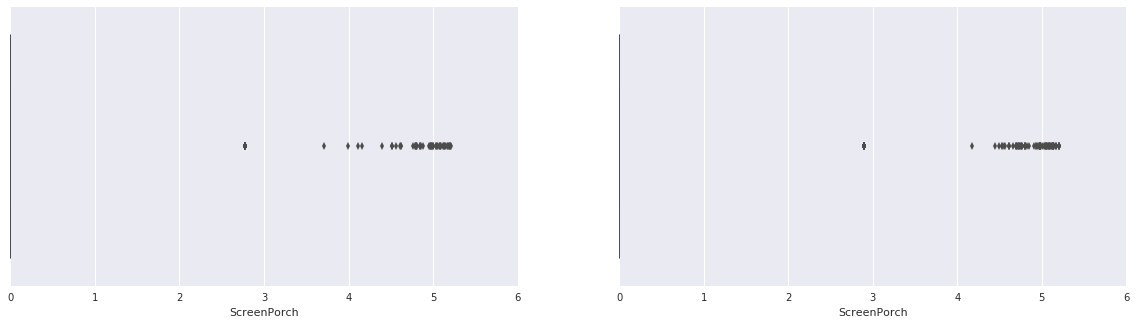

PoolArea

count    1460.000000
mean        0.006349
std         0.091497
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.324127
Name: PoolArea, dtype: float64

count    1459.000000
mean        0.004152
std         0.064629
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.009543
Name: PoolArea, dtype: float64


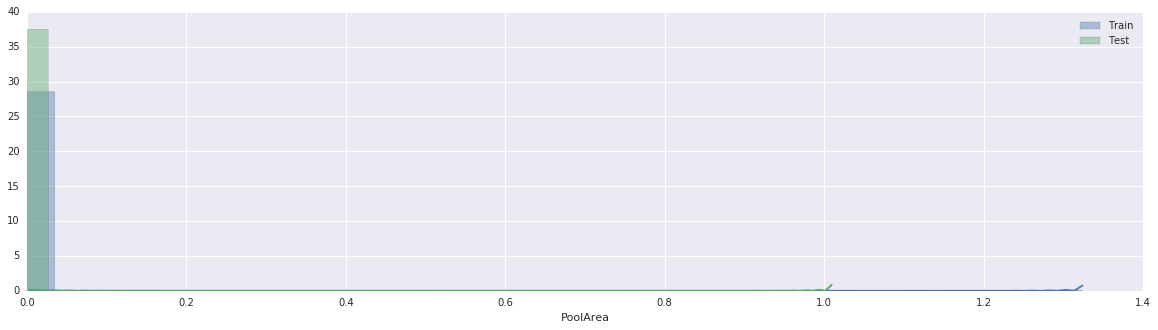

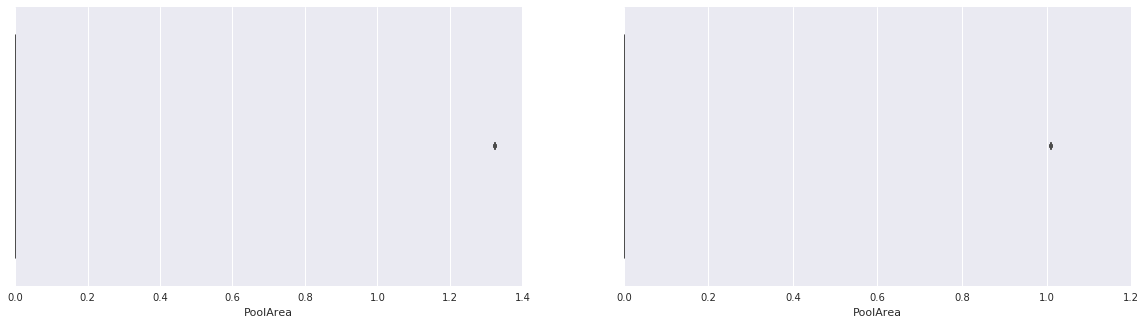

MiscVal

count    1460.000000
mean        0.209688
std         1.107710
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.244942
Name: MiscVal, dtype: float64

count    1459.000000
mean        0.204182
std         1.090384
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.321850
Name: MiscVal, dtype: float64


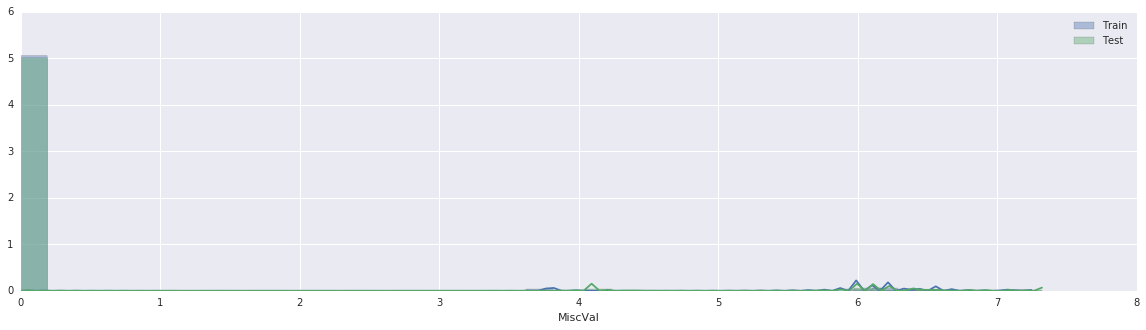

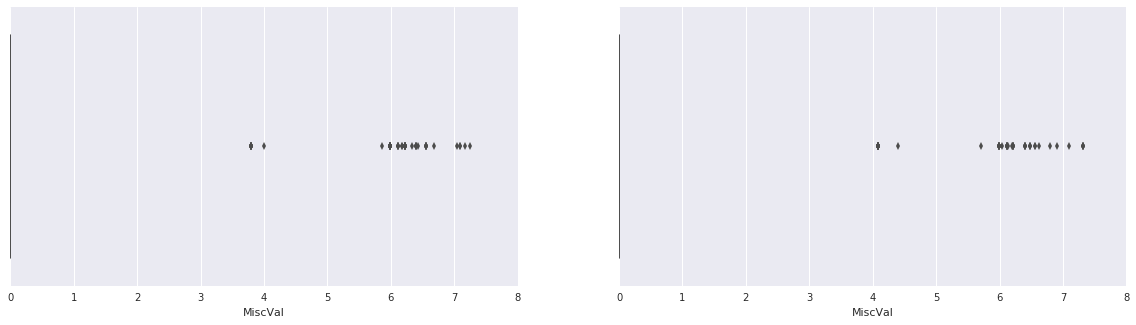

MoSold

count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64

count    1459.000000
mean        6.104181
std         2.722432
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64


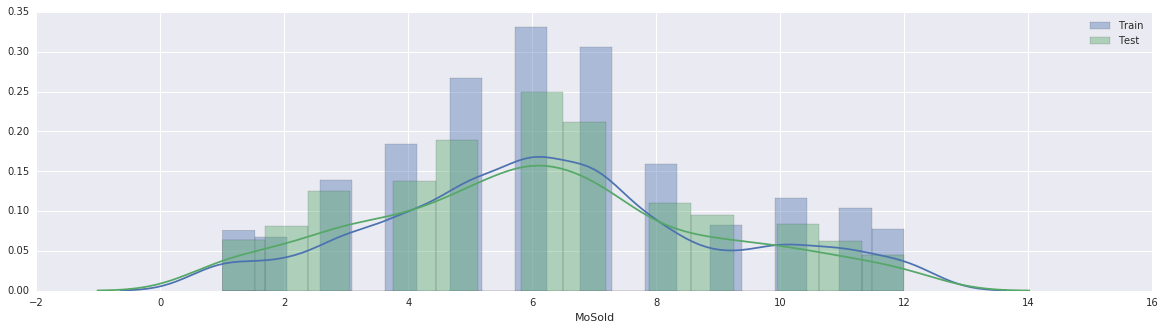

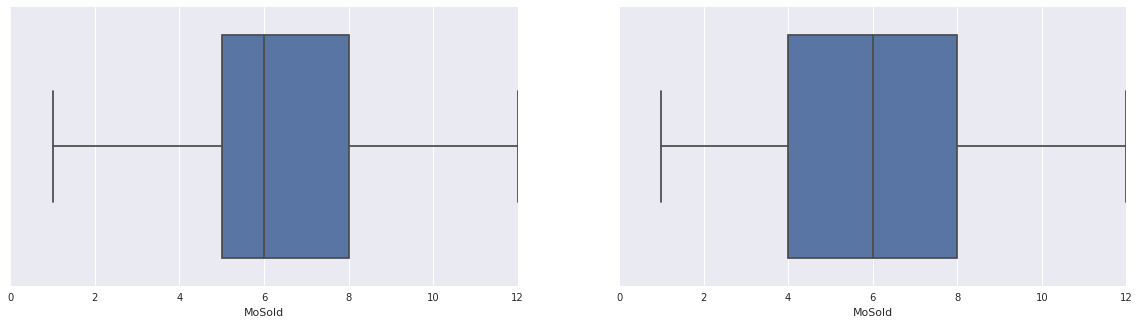

YrSold

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

count    1459.000000
mean     2007.769705
std         1.301740
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64


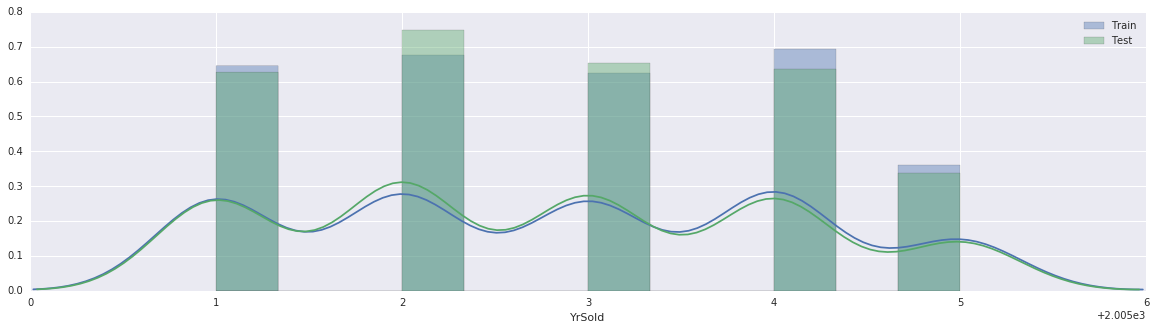

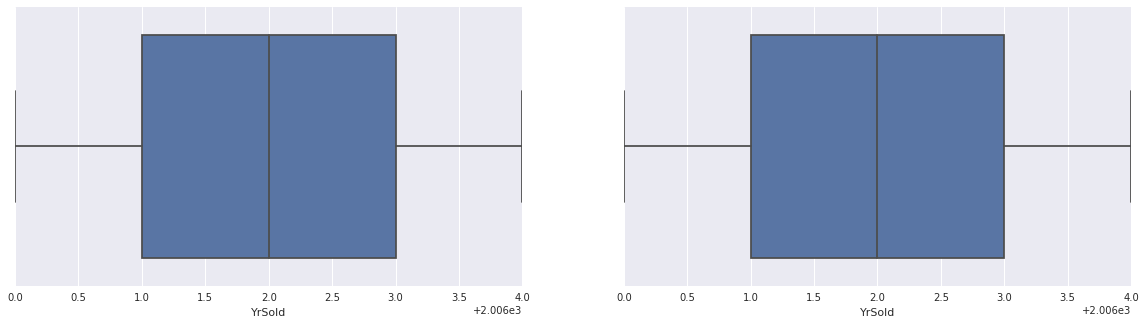

In [34]:
for column_name in continuous_int:
  print column_name
  print
  process_continuous(column_name)

In [35]:
sale_price = np.log(train.SalePrice)
id = train.Id

train = train.drop(['Id', 'SalePrice'], axis=1)

train['SalePrice'] = sale_price
train['Id'] = id

id = test.Id

test = test.drop(['Id'], axis=1)

test['Id'] = id

In [36]:
print train.shape, test.shape

(1460, 409) (1459, 408)


In [37]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)